<a href="https://colab.research.google.com/github/Fagner608/adidas_sales_analytics/blob/main/analise_adidas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# **Análise Exploratória de Dados de vendas da Adidas (2020-2021)**


## **Conhecendo a empresa**

*Adidas (estilizado como ɑdidɑs desde 1949) é uma empresa fundada na Alemanha. A empresa tem o nome de seu fundador, Adolf Dassler, também conhecido pelo apelido de Adi, que começou a produzir sapatilhas nos anos 1920, junto a seu irmão Rudolf Dassler, em Herzogenaurach, próximo de Nuremberg. O nome "adidas" é uma união entre o apelido de Adolf, Adi, e o início de seu sobrenome, Dassler.[4] A empresa criada pelos irmãos foi fundada em 1920, porém, foi dividida em 1948, dando origem à Adidas e também à Puma, empresa rival fundada por Rudolf Dassler, irmão de Adi.[5]* Fonte: [wikipédia](https://pt.wikipedia.org/wiki/Adidas) 

## **Sobre o conjunto de dados**

*Um conjunto de dados de vendas Adidas é uma coleção de dados que inclui informações sobre as vendas de produtos Adidas. Esse tipo de conjunto de dados pode incluir detalhes como número de unidades vendidas, receita total de vendas, local das vendas, tipo de produto vendido e qualquer outra informação relevante.

Os dados de vendas da Adidas podem ser úteis para diversos fins, como analisar tendências de vendas, identificar produtos ou campanhas de marketing de sucesso e desenvolver estratégias para vendas futuras. Também pode ser usado para comparar as vendas da Adidas com as dos concorrentes ou para analisar a eficácia de diferentes canais de marketing ou vendas.

Há uma variedade de fontes que poderiam fornecer um conjunto de dados de vendas da Adidas, incluindo a própria Adidas, empresas de pesquisa de mercado, agências governamentais ou outras organizações que rastreiam dados de vendas. Os pontos de dados específicos incluídos em um conjunto de dados de vendas da Adidas podem variar dependendo da fonte e da finalidade para a qual estão sendo usados*. Fonte [kaggle](https://www.kaggle.com/datasets/heemalichaudhari/adidas-sales-dataset)





## 1\. Contexto

**1.1. Definindo problema de negócio:**


1.   Qual foi o método de venda que mais gerou lucro operacional, no período analisado?
2.   Quais foram os 3 maiores vendedores, do método de venda que mais gerou lucro operacional?.
4.  Ranking das cidades que mais registraram vendas online.
5.  Mostrar em um mapa as cidades que registraram vendas online.

## 2\. Pacotes, bibliotecas e dados.

### 2.1. Bibliotecas.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import getpass
from matplotlib import cm
from datetime import datetime

import geopy
import folium
from geopy import Nominatim

import warnings
warnings.filterwarnings('ignore')

### 2.2. Carregando dataset.

In [ ]:
!wget 'https://raw.githubusercontent.com/Fagner608/adidas_sales_analytics/main/adidas_csv.csv' -O dados.csv

--2023-01-04 01:51:11--  https://raw.githubusercontent.com/Fagner608/dados_medicamentos/main/adidas_csv.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1144837 (1.1M) [text/plain]
Saving to: ‘dados.csv’

dados.csv           100%[===================>]   1.09M  --.-KB/s    in 0.05s   

2023-01-04 01:51:11 (20.8 MB/s) - ‘dados.csv’ saved [1144837/1144837]



### **Lendo dataset**

In [ ]:
dados_brutos  = pd.read_csv('./dados.csv', sep = ';')

In [ ]:
### INSERIR DICIONÁRIO DE DADOS

## 3\. Exploração de dados

### 3.1. Conhecendo a estrutura dos dados

In [ ]:
dados_brutos.shape

(9648, 13)

In [ ]:
dados_brutos.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object')

In [ ]:
dados_brutos.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,01/01/2020,Northeast,New York,New York,Men's Street Footwear,"$50,00",1.2,$600.000,$300.000,50%,In-store
1,Foot Locker,1185732,02/01/2020,Northeast,New York,New York,Men's Athletic Footwear,"$50,00",1.0,$500.000,$150.000,30%,In-store
2,Foot Locker,1185732,03/01/2020,Northeast,New York,New York,Women's Street Footwear,"$40,00",1.0,$400.000,$140.000,35%,In-store
3,Foot Locker,1185732,04/01/2020,Northeast,New York,New York,Women's Athletic Footwear,"$45,00",850.0,$382.500,$133.875,35%,In-store
4,Foot Locker,1185732,05/01/2020,Northeast,New York,New York,Men's Apparel,"$60,00",900.0,$540.000,$162.000,30%,In-store


#### **3.1.1. Resumo do dataset**

Os dados estão organizados em formato tabular e schema está bem definido. Por isso, aparentemente não será necessário implementar grande trabalho no pré-processamento para responder às questões de negócio levantadas.

Assim sendo, tendo em vista o problema de negócio definido no início da sessão, será procedida a filtragem dos dados, mantendo-se apenas o necessário.


### **3.2. Data wrangling**

#### 3.2.1. Filtragem dos dados

In [ ]:
dados = dados_brutos[['Retailer', 'Invoice Date', 'City',
       'Product', 'Units Sold', 'Total Sales','Operating Profit', 'Operating Margin', 'Sales Method']]

dados.head()

,Retailer,Invoice Date,City,Product,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,01/01/2020,New York,Men's Street Footwear,1.2,$600.000,$300.000,50%,In-store
1,Foot Locker,02/01/2020,New York,Men's Athletic Footwear,1.0,$500.000,$150.000,30%,In-store
2,Foot Locker,03/01/2020,New York,Women's Street Footwear,1.0,$400.000,$140.000,35%,In-store
3,Foot Locker,04/01/2020,New York,Women's Athletic Footwear,850.0,$382.500,$133.875,35%,In-store
4,Foot Locker,05/01/2020,New York,Men's Apparel,900.0,$540.000,$162.000,30%,In-store


#### 3.2.2. Verificando dados faltantes

In [ ]:
dados.isnull().any()

Retailer            False
Invoice Date        False
City                False
Product             False
Units Sold          False
Total Sales         False
Operating Profit    False
Operating Margin    False
Sales Method        False
dtype: bool

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Retailer          9648 non-null   object 
 1   Invoice Date      9648 non-null   object 
 2   City              9648 non-null   object 
 3   Product           9648 non-null   object 
 4   Units Sold        9648 non-null   float64
 5   Total Sales       9648 non-null   object 
 6   Operating Profit  9648 non-null   object 
 7   Operating Margin  9648 non-null   object 
 8   Sales Method      9648 non-null   object 
dtypes: float64(1), object(8)
memory usage: 678.5+ KB


#### 3.2.3. Resultado
- Não existem dados faltantes
- Os atributos 'total sales', 'operating margem' e 'operating margin' precisarão de tratamento para adequar os dados ao tipo correto.

#### 3.2.3 Iniciando tratamento dos labels

In [ ]:
dados['Total Sales'] = dados['Total Sales'].apply(lambda x: float(x.split('$')[1]))

dados['Operating Margin'] = dados['Operating Margin'].apply(lambda x: float(x.split('%')[0]))

dados['Operating Profit'] = dados['Operating Profit'].apply(lambda x: float(x.split('$')[1]))

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Retailer          9648 non-null   object 
 1   Invoice Date      9648 non-null   object 
 2   City              9648 non-null   object 
 3   Product           9648 non-null   object 
 4   Units Sold        9648 non-null   float64
 5   Total Sales       9648 non-null   float64
 6   Operating Profit  9648 non-null   float64
 7   Operating Margin  9648 non-null   float64
 8   Sales Method      9648 non-null   object 
dtypes: float64(4), object(5)
memory usage: 678.5+ KB


## **4. Iniciando descrição estatística dos dados**

### 4.1 Dados numéricos

In [ ]:
dados.select_dtypes('float64').describe().T

,count,mean,std,min,25%,50%,75%,max
Units Sold,9648.0,250.989674,206.027554,0.0,105.0000,175.0000,325.0,975.0
Total Sales,9648.0,104.446437,163.081224,0.0,4.4815,10.1955,162.5,999.0
Operating Profit,9648.0,100.218875,207.386990,0.0,2.6450,9.2190,84.0,999.0
Operating Margin,9648.0,42.299129,9.719742,10.0,35.0000,41.0000,49.0,80.0


### 4.2. Dados categóricos

In [ ]:
dados.select_dtypes('object').describe().T

,count,unique,top,freq
Retailer,9648,6,Foot Locker,2637
Invoice Date,9648,724,17/01/2021,77
City,9648,52,Portland,360
Product,9648,6,Men's Street Footwear,1610
Sales Method,9648,3,Online,4889


## **5. Iniciando pesquisa**

  

### **5.1. Qual foi o método de venda que mais gerou lucro operacional, no período analisado?**

#### 5.1.1. Selecionando atributos

In [ ]:
profit_methods = dados[['Sales Method', 'Operating Profit']].groupby('Sales Method').agg('sum')

profit_methods['relative_profts'] = profit_methods['Operating Profit'].apply(lambda x: round(x / profit_methods['Operating Profit'].sum() * 100, 2))
profit_methods

,Operating Profit,relative_profts
Sales Method,,
In-store,127591.382,13.20
Online,515003.470,53.26
Outlet,324316.858,33.54


#### 5.1.2. Preparando labels para o gráfico

In [ ]:
labels = [str(i) + " " + '[' + str(profit_methods.loc['{}'.format(i), 'relative_profts']) + "%" + "]" for i in profit_methods.index]

#### 5.1.3. Visualizando gráfico

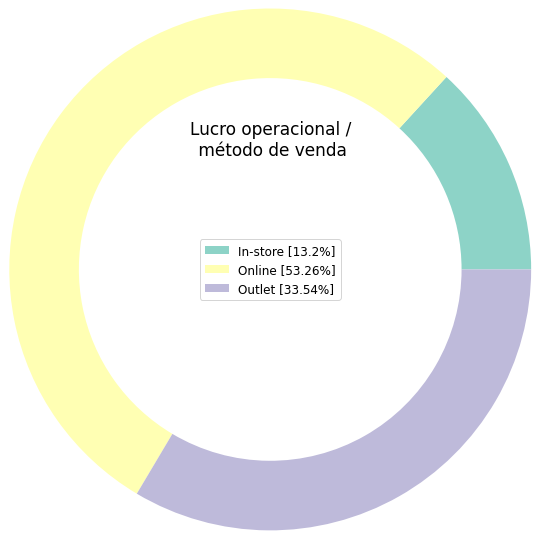

In [ ]:
cs = cm.Set3(np.arange(100))

    
f = plt.figure()

plt.pie(profit_methods['relative_profts'], labeldistance = 1, radius= 3, colors = cs, wedgeprops = dict(width = 0.8))
plt.legend(labels = labels, loc = "center", prop = {'size':12})
plt.title("Lucro operacional /\n método de venda", loc = "Center", fontdict = {"fontsize": 17, "fontweight":17})
plt.show()

#### **5.1.4. Respondendo a questão de negócio 1:**
  - O método de venda que mais contribuiu para o resultado, é a venda online, responsável por 53.26% do lucro operacional gerado no período analisado.

###  **5.2.  Mostrar os 3 maiores vendedores, do método de venda que mais gerou lucro operacional?**

In [ ]:
dados.head()

,Retailer,Invoice Date,City,Product,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,01/01/2020,New York,Men's Street Footwear,1.2,600.0,300.000,50.0,In-store
1,Foot Locker,02/01/2020,New York,Men's Athletic Footwear,1.0,500.0,150.000,30.0,In-store
2,Foot Locker,03/01/2020,New York,Women's Street Footwear,1.0,400.0,140.000,35.0,In-store
3,Foot Locker,04/01/2020,New York,Women's Athletic Footwear,850.0,382.5,133.875,35.0,In-store
4,Foot Locker,05/01/2020,New York,Men's Apparel,900.0,540.0,162.000,30.0,In-store


#### 5.2.1. Realizando seleção, agrupamento e sumarização de dados

In [ ]:
top3_retailer = dados[['Sales Method', "Operating Profit", 'Retailer']]

top3_retailer.columns = ['Sales_Method', 'Operating_Profit', 'Retailer']

top3_retailer = top3_retailer.query('Sales_Method == "Online"').reset_index(drop = True)

top3_retailer.drop('Sales_Method', axis = 1, inplace=True)

top3_retailer = top3_retailer.groupby('Retailer').agg('sum').sort_values(by = 'Operating_Profit', ascending = False)



#### 5.2.2. Selecionando os Top 3 vendedores.

In [ ]:
other = {}
other['Operating_Profit'] = top3_retailer.query('Operating_Profit < 87588.214').sum()['Operating_Profit']

top3_retailer = top3_retailer.query('Operating_Profit >= 87588.214')

top3_retailer = top3_retailer.append(pd.DataFrame(other, index = ['other']))

top3_retailer = top3_retailer.apply(lambda x: round(x / top3_retailer['Operating_Profit'].sum()*100, 2))

top3_retailer

,Operating_Profit
Foot Locker,207139.714
West Gear,109000.446
Sports Direct,87588.214
other,111275.096


#### 5.2.3. Preparando labels para o gráfico

In [ ]:
labels_retailer  = [str(i)  + " " + "[" + str(top3_retailer.loc['{}'.format(i)][0]) + "%" + "]"  for i in top3_retailer.index]
labels_retailer

['Foot Locker [40.22%]',
 'West Gear [21.16%]',
 'Sports Direct [17.01%]',
 'other [21.61%]']

#### 5.2.4. Visualizando gráfico

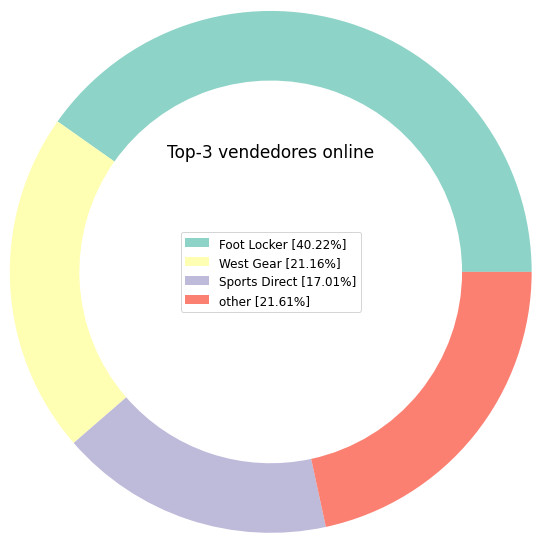

In [ ]:
cs = cm.Set3(np.arange(100))
f = plt.figure()


plt.pie(top3_retailer, labeldistance = 1, radius= 3, colors = cs, wedgeprops = dict(width = 0.8))
plt.legend(labels = labels_retailer, loc = "center", prop = {'size':12})
plt.title("Top-3 vendedores online", loc = "Center", fontdict = {"fontsize": 17, "fontweight":17})
plt.show()

#### **5.2.5. Respondendo à questão de negócio 2:**
  - Os Top-3 vendedores, em vendas online, foram:
        1.   Foot Locker
        2.   West Gear
        3.   Sports Direct

Outros vendedores contribuiram com 21.61% da vendas online.



### **6. Ranking das cidades que mais registraram vendas online**

#### 6.1. Seleção, agregação e sumarização de variáveis

In [ ]:
#Preparando variáveis de interesse
profit_cities = dados[['City', 'Operating Profit', 'Sales Method']]

profit_cities.columns = ['City', 'Operating_Profit', 'Sales_Method']

profit_cities = profit_cities.query('Sales_Method == "Online"')

profit_cities.drop('Sales_Method', axis = 1, inplace = True)

profit_cities = profit_cities.groupby('City').agg('sum')

profit_cities['relative_profts'] = profit_cities['Operating_Profit'].apply(lambda x: round(x / profit_cities['Operating_Profit'].sum()*100, 2))

profit_cities.drop('Operating_Profit', axis = 1, inplace = True)

#### 6.2. Destacando cidades que correspondem a menos de 1% do lucro operacional

In [ ]:
other_profit = {}

other_profit['relative_profts'] = profit_cities.query('relative_profts < 1.00')['relative_profts'].sum()

profit_cities = profit_cities.query('relative_profts >= 1.00')

profit_cities = profit_cities.append(pd.DataFrame(other_profit, index = ['Others']))

profit_cities = profit_cities.sort_values(by = 'relative_profts', ascending = False)

#### 6.3. Visualizando gráfico

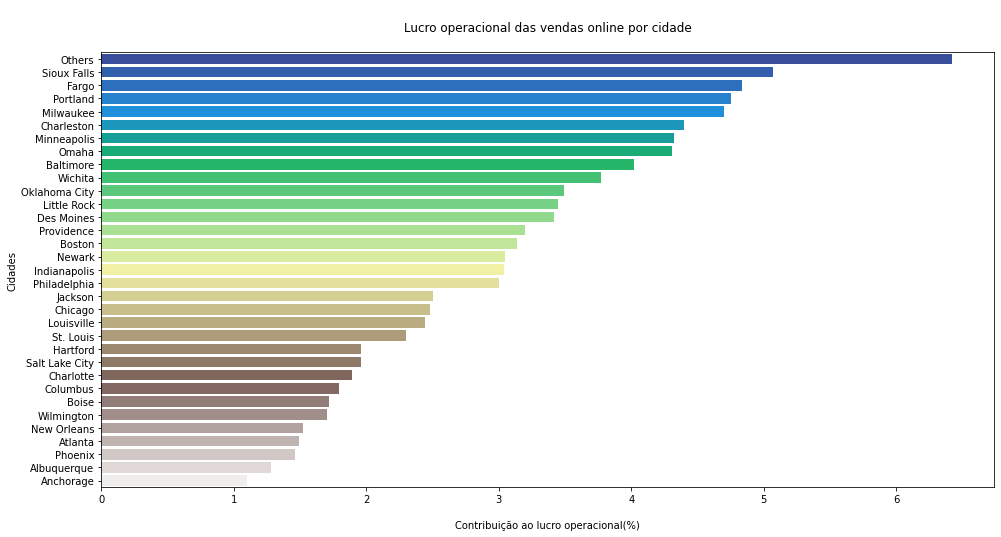

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x = profit_cities['relative_profts'], y = profit_cities.index, orient = 'h', palette = "terrain")
plt.ylabel('Cidades')
plt.xlabel('\nContribuição ao lucro operacional(%)')
plt.title('\nLucro operacional das vendas online por cidade\n')
plt.show()

#### **6.4. Impressões do gráfico das cidades que mais registraram vendas online**

  - O gráfico mostra o equilíbrio entre as cidades que mais venderam, e o conjunto que se forma com as cidades que registraram menos de 1% no lucro operacional. Observe, que um grande grupo de cidades registrou, sozinha, mais de 1% - algumas, inclusive, se destacam com mais de 3% -; contudo, a categoria 'others', formada por cidades que registraram menos de 1% apresentam a maior participação no lucro operacional do período, com mais de 6%.

#### **Inserindo no mapa as cidade acima mencionadas**

In [ ]:
profit_cities.drop('Others', inplace = True)


In [ ]:
#instanciando usuario
geolocator = Nominatim(user_agent = 'my_project')

In [ ]:
#buscando dados geográficos
for i in profit_cities.index:
   location = geolocator.geocode(i)
   if location:
     profit_cities.loc[i, 'latitude'] = location.latitude
     profit_cities.loc[i, 'longitude'] = location.longitude
   else:
      profit_cities.loc[i, 'latitude'] = None
      profit_cities.loc[i, 'longitude'] = None

In [ ]:
#conferindo se todos os dados foram encontrados
profit_cities.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Sioux Falls to Anchorage
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   relative_profts  32 non-null     float64
 1   latitude         32 non-null     float64
 2   longitude        32 non-null     float64
dtypes: float64(3)
memory usage: 2.0+ KB


In [ ]:
#criando marcadores
marcadores = []

for i in profit_cities.index:
  cidade = i
  lat = profit_cities.loc[i, 'latitude']
  lon = profit_cities.loc[i, 'longitude']
  marcadores.append((cidade, lat, lon))

In [ ]:
#Instanciando mapa
mapa = folium.Map(location=[43.548826,	-96.730774], zoom_start=3.2)

In [ ]:
#Instanciando marcadores
for cidade, lat, lon in marcadores:
  dados = folium.CircleMarker(
    location=[lat, lon],
    radius=5,
    popup= cidade,
    color="#3186cc",
    fill=True,
    fill_color="#3186cc",
)
  dados.add_to(mapa)

In [ ]:
#salvando dados
mapa.save('index.html')

In [ ]:
#plotando mapa
mapa

#### **Impressões do mapa geográfico das vendas**
  - Por fim, o mapa evidencia que a grande parte das vendas online, no período analisado, vem da costa leste dos Estados Unidos. Isso inseja várias conjecturas sobre as possíveis causas, a primeira a ser analisada, seria a área coberta pelas 3 principais empresas de vendas online acima citadas.